## Çalışma Hakkında 
Bu veri NoteBook Antalya ilindeki öğretmen kadro fazlalıklarını ve ihtiyaçları incelemek için oluşturulmuştur.

HF https://huggingface.co/spaces/drmurataltun/AntalyaNorm

## Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Veri Setinin Yüklenmesi

In [3]:
ihtiyac_df=pd.read_excel("/kaggle/input/retmen-saylar-antalya-norm-fazlas-ve-ihtiya/ihtiyac_data.xlsx")
fazla_df=pd.read_excel("/kaggle/input/retmen-saylar-antalya-norm-fazlas-ve-ihtiya/norm_fazlasi.xlsx")

## Keşifsel Veri Analizi

In [4]:
ihtiyac_df.head()

,ilçe,okul,hizmet_bolgesi,branş,ihtiyac
0,SERİK,9 Mart İlkokulu,1,Özel Eğitim,4
1,SERİK,Serik Mesleki Eğitim Merkezi,1,Rehberlik,1
2,SERİK,Serik Rehberlik ve Araştırma Merkezi,4,Rehberlik,1
3,SERİK,Yukarı Kocayatak İlkokulu,2,Rehberlik,1
4,SERİK,Serik Yunus Emre Anadolu Lisesi,1,Sağlık Bilgisi,1


In [5]:
ihtiyac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ilçe            1374 non-null   object
 1   okul            1374 non-null   object
 2   hizmet_bolgesi  1374 non-null   object
 3   branş           1374 non-null   object
 4   ihtiyac         1374 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 53.8+ KB


In [6]:
#Branş bazında ihtiyaç sayılarının toplamlarını bulalım
ihtiyac_df.groupby('branş')['ihtiyac'].sum().sort_values(ascending=False)

branş
Özel Eğitim                                                             996
Din Kültürü ve Ahlâk Bilgisi                                            529
Sınıf Öğretmenliği                                                      155
Okul Öncesi                                                              95
İngilizce                                                                67
Güzellik ve Saç Bakım Hizmetleri / Güzellik Hizmetleri                   62
Motorlu Araçlar Teknolojisi                                              51
Rehberlik                                                                45
Sosyal Bilgiler                                                          44
Türkçe                                                                   39
Beden Eğitimi                                                            31
Türk Dili ve Edebiyatı                                                   27
Sağlık Bilgisi                                                           27
Matema

<Axes: ylabel='ihtiyac'>

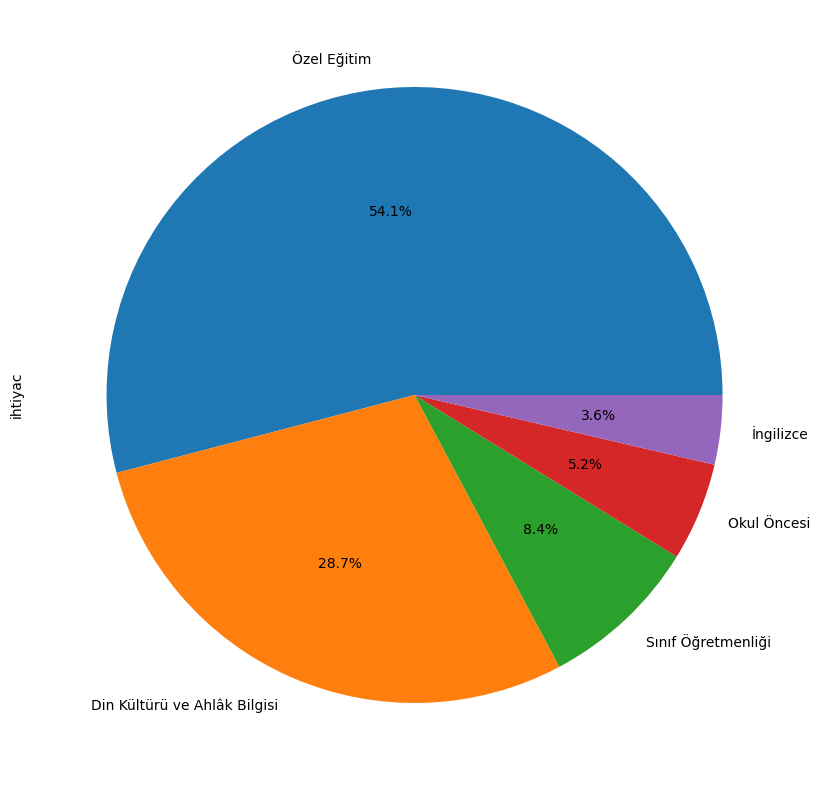

In [7]:
#en çok ihtiyaç duyulan ilk 5 branş
ihtiyac_df.groupby('branş')['ihtiyac'].sum().sort_values(ascending=False)[:5].plot(kind='pie',autopct='%1.1f%%',figsize=(10,10))

In [8]:
ihtiyac_df[ihtiyac_df['branş']=='Pazarlama ve Perakende']

,ilçe,okul,hizmet_bolgesi,branş,ihtiyac
200,MURATPAŞA,Şehit Serkan Çölkesen Mesleki ve Teknik Anadol...,1,Pazarlama ve Perakende,1


In [9]:
fazla_df.head()

,S.N,Adı,Branşı,HizmetPuanı,İlçe Adı,Kadrosunun Bulunduğu Kurum Okul/Kurum,Açıklamalar
0,1,DÖ*****,Fizik,144.0,AKSEKİ,İlçe Milli Eğitim Müdürlüğü,Yurtdışı görevinde
1,2,HA*****,Türkçe,174.0,AKSEKİ,İlçe Milli Eğitim Müdürlüğü,Aylıksız İzinde
2,3,HÜ*****,Okul Öncesi,428.0,AKSEKİ,Taşlıca Ahmet Hamdi Akseki İlkokulu,NaN
3,4,Fİ*****,Teknoloji ve Tasarım,641.0,AKSEKİ,Taşlıca Ahmet Hamdi Akseki Ortaokulu,NaN
4,5,Sİ*****,Çocuk Gelişimi ve Eğitimi,239.0,AKSEKİ,İlçe Milli Eğitim Müdürlüğü,NaN


In [10]:
#İlçeler bazında norm fazlası sayıları
fazla_df.groupby('İlçe Adı').count()

,S.N,Adı,Branşı,HizmetPuanı,Kadrosunun Bulunduğu Kurum Okul/Kurum,Açıklamalar
İlçe Adı,,,,,,
AKSEKİ,6,6,6,6,6,2
AKSU,83,83,83,83,83,10
ALANYA,211,211,211,211,211,16
DEMRE,44,44,44,44,44,2
DÖŞEMEALTI,156,156,156,156,156,17
ELMALI,37,37,37,37,37,6
FİNİKE,60,60,60,60,60,6
GAZİPAŞA,73,73,73,73,73,1
GÜNDOĞMUŞ,6,6,6,6,6,1


<Axes: xlabel='İlçe Adı'>

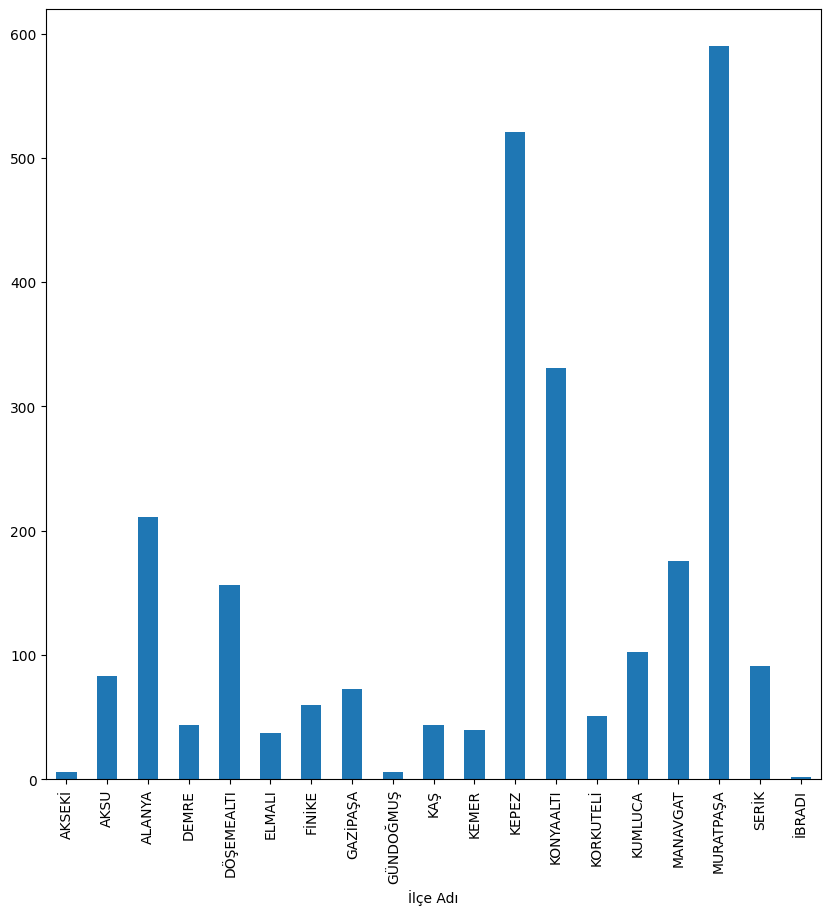

In [11]:
#İlçe bazlı norm fazlası sayıları toplamı
fazla_df.groupby('İlçe Adı')['S.N'].count().plot(kind='bar',figsize=(10,10))

In [12]:
#İlçeler ve branş bazında norm fazlası sayıları
#çıktıda tüm satırları göster
pd.set_option('display.max_rows', None)
fazla_df.groupby(['İlçe Adı','Branşı'])['Adı'].count()

İlçe Adı    Branşı                                                              
AKSEKİ      Fizik                                                                    1
            Okul Öncesi                                                              1
            Rehberlik                                                                1
            Teknoloji ve Tasarım                                                     1
            Türkçe                                                                   1
            Çocuk Gelişimi ve Eğitimi                                                1
AKSU        Beden Eğitimi                                                            9
            Bilişim Teknolojileri                                                    6
            Biyoloji                                                                 4
            Coğrafya                                                                 1
            El Sanatları Teknolojisi / Nakış     

<Axes: xlabel='Branşı'>

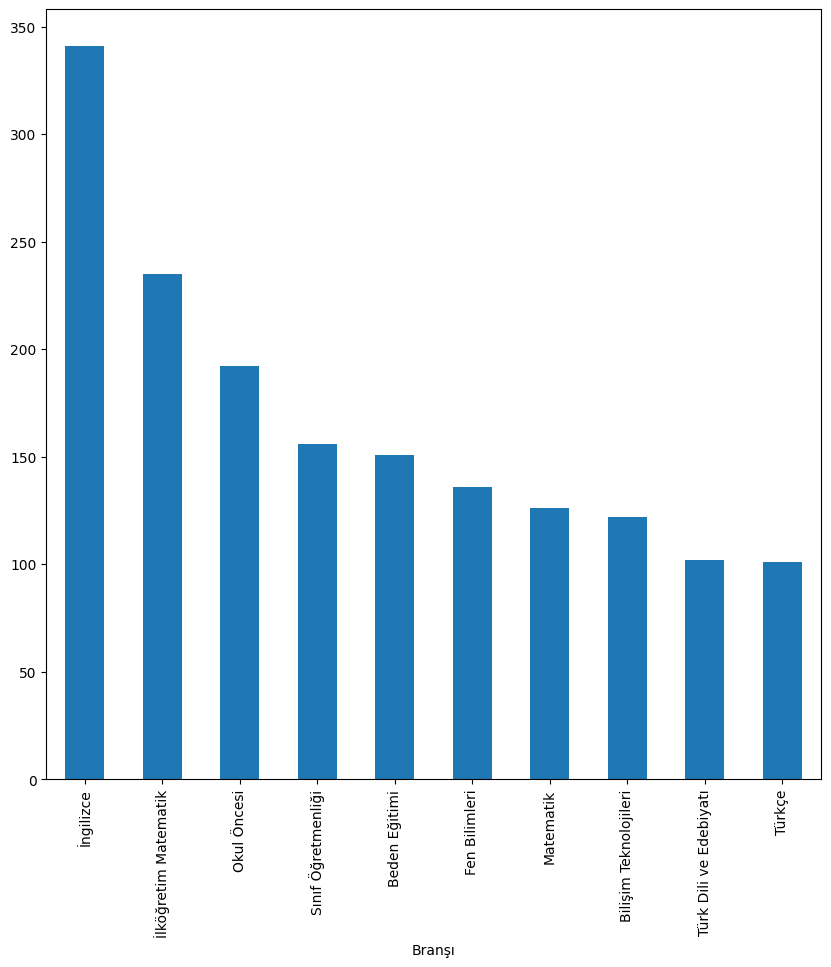

In [13]:
#İlçe bazlı norm fazlası sayıları toplamı
fazla_df.groupby('Branşı')['S.N'].count().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(10,10))